### **Monte Carlo Methods in Statistical Physics: The Ising Model**

**Concept:**

The Ising model is a mathematical model of ferromagnetism in statistical mechanics. It consists of discrete variables (spins) that represent magnetic dipole moments of atomic spins, which can be in one of two states (+1 or -1).

**Simulation Steps:**

1. **Initialize the Spin Lattice:**

   - Create a grid where each site has a spin value of +1 or -1.
   
2. **Define the Hamiltonian (Energy Function):**

   - The energy of a state depends on the interaction between neighboring spins and an external magnetic field.
   
3. **Apply the Metropolis Algorithm:**

   - At each step, propose flipping a spin and decide whether to accept the change based on the change in energy and temperature.
   
4. **Compute Observables:**

   - Calculate quantities like magnetization and susceptibility over time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_lattice(N):
    # Randomly initialize spins to +1 or -1
    lattice = np.random.choice([-1,1], size=(N, N))
    return lattice

In [3]:
def calculate_energy(lattice, J):
    # Periodic boundary conditions
    energy = 0
    N = lattice.shape[0]
    for i in range(N):
        for j in range(N):
            S = lattice[i, j]
            nb = lattice[(i+1)%N, j] + lattice[i, (j+1)%N] + lattice[(i-1)%N, j] + lattice[i, (j-1)%N]
            energy += -J * S * nb
    return energy /2    # Each pair counted twice

In [4]:
def metropolis_step(lattice, beta, J):
    N = lattice.shape[0]
    for _ in range(N**2):
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        S = lattice[i, j]
        nb = lattice[(i+1)%N, j] + lattice[i, (j+1)%N] + lattice[(i-1)%N, j] + lattice[i, (j-1)%N]
        delta_E = 2 * J * S * nb
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E * beta):
            lattice[i, j] *= -1
    return lattice

In [5]:
def monte_carlo_ising(N, T, J, num_steps):
    lattice = initialize_lattice(N)
    beta = 1.0 / T
    energies = []
    magnetizations = []
    for step in range(num_steps):
        lattice = metropolis_step(lattice, beta, J)
        energy = calculate_energy(lattice, J)
        magnetization = np.sum(lattice)
        energies.append(energy)
        magnetizations.append(magnetization)
    return energies, magnetizations, lattice

In [6]:
# Parameters
N = 20          # Lattice size N x N
T = 2.0         # Temperature
J = 1.0         # Interaction energy
num_steps = 1000

In [7]:
# Run simulation
energies, magnetizations, final_lattice = monte_carlo_ising(N, T, J, num_steps)

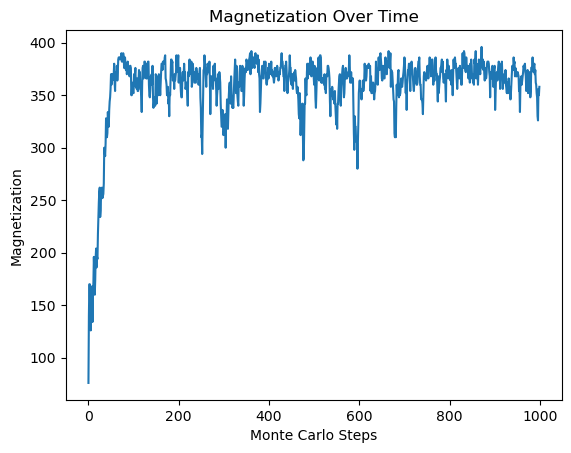

In [8]:
# Plotting magnetization over time
plt.plot(magnetizations)
plt.title('Magnetization Over Time')
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Magnetization')
plt.show()

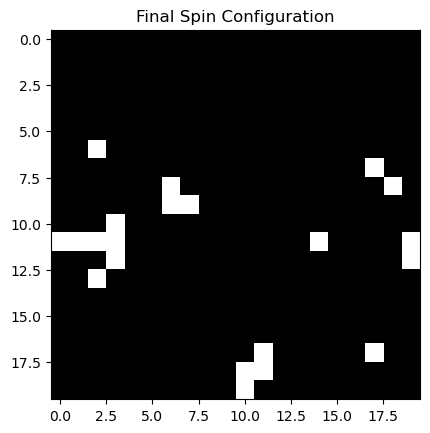

In [9]:
# Visualize final lattice configuration
plt.imshow(final_lattice, cmap='Greys', interpolation='nearest')
plt.title('Final Spin Configuration')
plt.show()

**Explanation:**

- **Metropolis Algorithm:** Decides whether to flip a spin based on energy change and temperature.
- **Observables:**
  - **Energy:** Total energy of the lattice configuration.
  - **Magnetization:** Sum of all spins, indicating the net magnetic moment.

**Benefits:**

- Allows exploration of phase transitions and critical phenomena.
- Provides insights into material properties at different temperatures.